In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\msyeu\Hate Crime Analysis'

In [5]:
#Import Data
df=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'new_hate_crime_wrangled.csv'))

In [6]:
df.shape

(180293, 11)

In [7]:
df.head()

,Unnamed: 0,incident_year,state_abbr,state_name,region_name,offender_count,offender_race,victim_count,offense_type,total_individual_victims,prejudice
0,0,1991,AR,Arkansas,South,1,White,1,Intimidation,1.0,Anti-Black or African American
1,1,1991,AR,Arkansas,South,1,Black or African American,1,Simple Assault,1.0,Anti-White
2,2,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,1.0,Anti-Black or African American
3,3,1991,AR,Arkansas,South,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Anti-White
4,4,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,1.0,Anti-White


In [8]:
#Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'state_abbr', 'state_name', 'region_name', 'offender_race', 'offense_type', 'prejudice'], axis = 1)

In [9]:
df.head()

,incident_year,offender_count,victim_count,total_individual_victims
0,1991,1,1,1.0
1,1991,1,1,1.0
2,1991,1,1,1.0
3,1991,1,2,1.0
4,1991,1,1,1.0


# 2. Elbow Technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

C:\Users\msyeu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\msyeu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\msyeu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\msyeu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\msyeu\anaconda3\Lib\site-packages\sklearn\clust

In [12]:
score

[-11373633.991335621,
 -3543270.102469892,
 -2008107.5219700576,
 -1433347.3922715553,
 -1203857.5897374093,
 -1042184.2656446635,
 -937367.80082089,
 -848583.8557503445,
 -755958.8695699224]

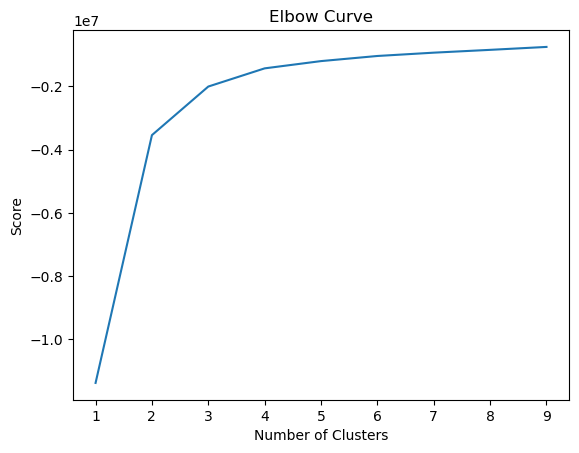

In [13]:
#Plot the elbow curve using PyLab. 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from 2 to 3 on the x-axis and a small jamp from 3 to 4, but after that, the curve straightens out. This means that the optimal count for my clusters is 4. 

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_init = 1) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=4, n_init=1)

In [16]:
df['clusters'] = kmeans.fit_predict(df)

In [17]:
df.head()

,incident_year,offender_count,victim_count,total_individual_victims,clusters
0,1991,1,1,1.0,2
1,1991,1,1,1.0,2
2,1991,1,1,1.0,2
3,1991,1,2,1.0,2
4,1991,1,1,1.0,2


In [18]:
df['clusters'].value_counts()

clusters
2    53626
0    51119
3    44655
1    30893
Name: count, dtype: int64

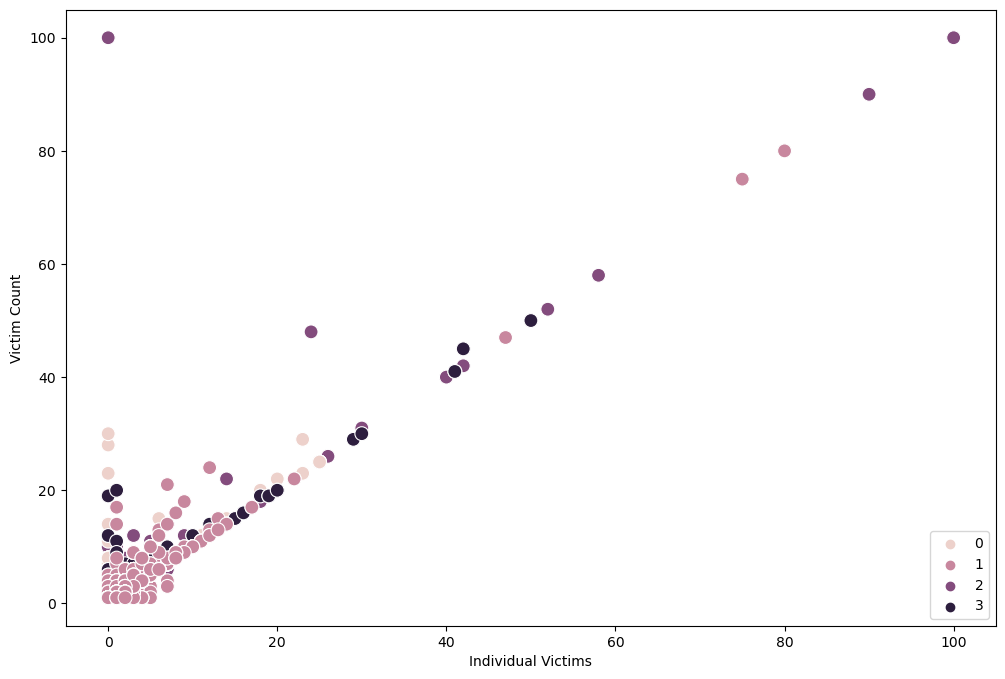

In [19]:
# Plot the clusters for the "Individual Victims" and "Victim Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_individual_victims'], y=df['victim_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Individual Victims') # Label x-axis.
plt.ylabel('Victim Count') # Label y-axis.
plt.show()

In this plot, we observe a positive relationship between the count of individual victims and the victim count. This supports our hypothesis that as the number of individual victims increases, the overall victim count also increases.

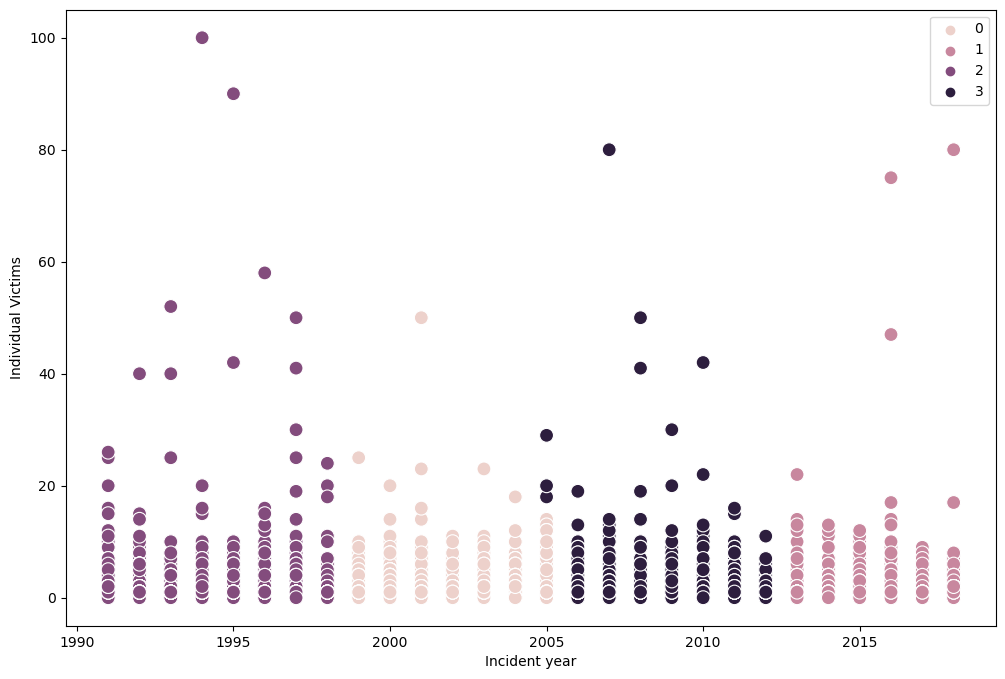

In [20]:
# Plot the clusters for the "Incident year" and "Individual Victims" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['incident_year'], y=df['total_individual_victims'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Incident year') 
plt.ylabel('Individual Victims') 
plt.show()

This plot also aligns as it is giving a frequency of victims for each year. 

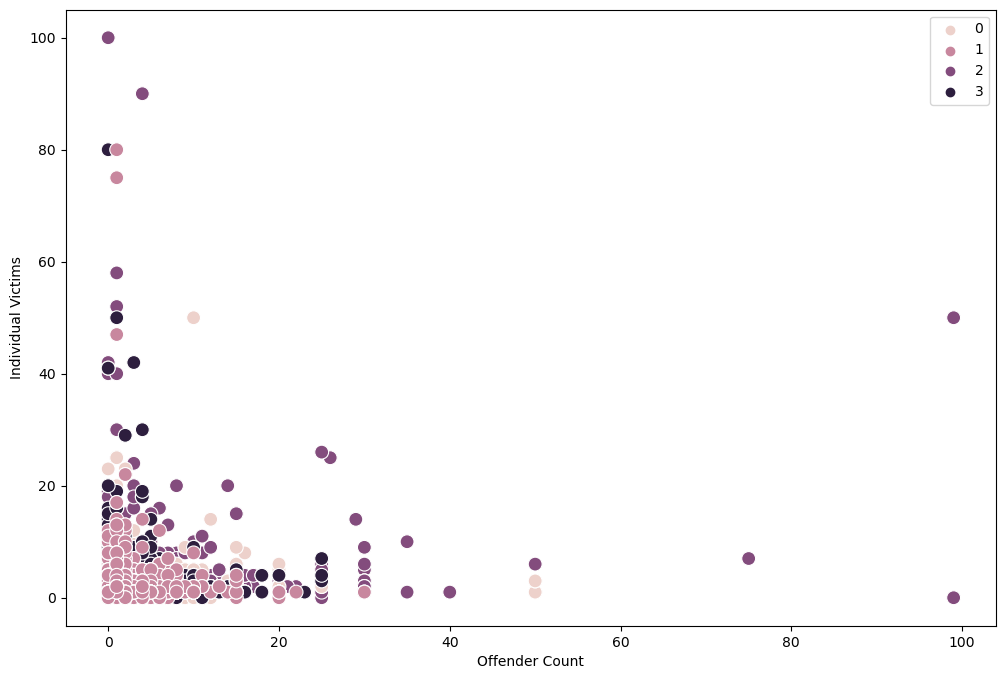

In [21]:
# Plot the clusters for the "Offender Count" and "Individual Victims" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['offender_count'], y=df['total_individual_victims'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Offender Count') 
plt.ylabel('Individual Victims') 
plt.show()

This plot demonstrates no discernible relationship between the count of offenders and the count of individual victims. This aligns with the understanding that there is no correlation between the number of offenders and the number of victims.

In [22]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'green'
df.loc[df['clusters'] == 0, 'cluster'] = 'light green'

In [23]:
df.groupby('clusters').agg({'offender_count':['mean', 'median'], 
                         'victim_count':['mean', 'median'], 
                         'total_individual_victims':['mean', 'median']})

offender_count        victim_count        total_individual_victims  \
                   mean median         mean median                     mean   
clusters                                                                      
0              0.963086    1.0     1.228565    1.0                 0.875878   
1              0.946072    1.0     1.234843    1.0                 1.049137   
2              1.093201    1.0     1.257431    1.0                 1.037780   
3              0.942851    1.0     1.248013    1.0                 1.021252   

                 
         median  
clusters         
0           1.0  
1           1.0  
2           1.0  
3           1.0

The data grouping reveals that each offender has a median of at least 1 victim.